In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as datetime
from datetime import datetime as dt
today=dt.today()

today = datetime.date(month=today.month, day=today.day, year=today.year)
yesterday=today-datetime.timedelta(days=1)

sns.set_style("darkgrid",{"axes.facebolor":"0.90"})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":2.5})

import pylab
pylab.rcParams['figure.figsize'] = (15, 8)
plt.style.use('fivethirtyeight')
#custom fetch
import fetcher
fetcher.fetch()
print(f"LOCAL FETCH: world_{today.strftime('%b-%d-%Y')}.csv")
df = pd.read_csv(f"world_{today.strftime('%b-%d-%Y')}.csv",index_col='date', parse_dates=True)
print("LOCAL FETCH COMPLETE.")
#custom fetch


usa=df[df['location'] == 'United States']
usa_rolling7=usa['total_cases'].diff(1).fillna(0).rolling(7).mean()

File ~ world_Jan-18-2022.csv ~ Already Exists
LOCAL FETCH: world_Jan-18-2022.csv
LOCAL FETCH COMPLETE.


# <font color=#cf0234> Total COVID-19 Cases in United States as of Today </font>
   

In [60]:
print(f"USA TOTAL CASE COUNT: {usa['total_cases'].diff(1).fillna(0).sum():,} as of "+today.strftime("%A")+' '+str(today))

USA TOTAL CASE COUNT: 66,529,282.0 as of Tuesday 2022-01-18


# <font color=#cf0234> Yesterday's New Cases </font>
   

In [61]:
usa_daily=usa['total_cases'].diff(1).fillna(0)
yesterday=usa_daily[-1]
print("YESTERDAY")
print(f"{today.strftime('%b-%d-%y, %A')} case count: ",f"{yesterday:,}")

YESTERDAY
Jan-18-22, Tuesday case count:  825,408.0


Text(0.5, 0, 'Date')

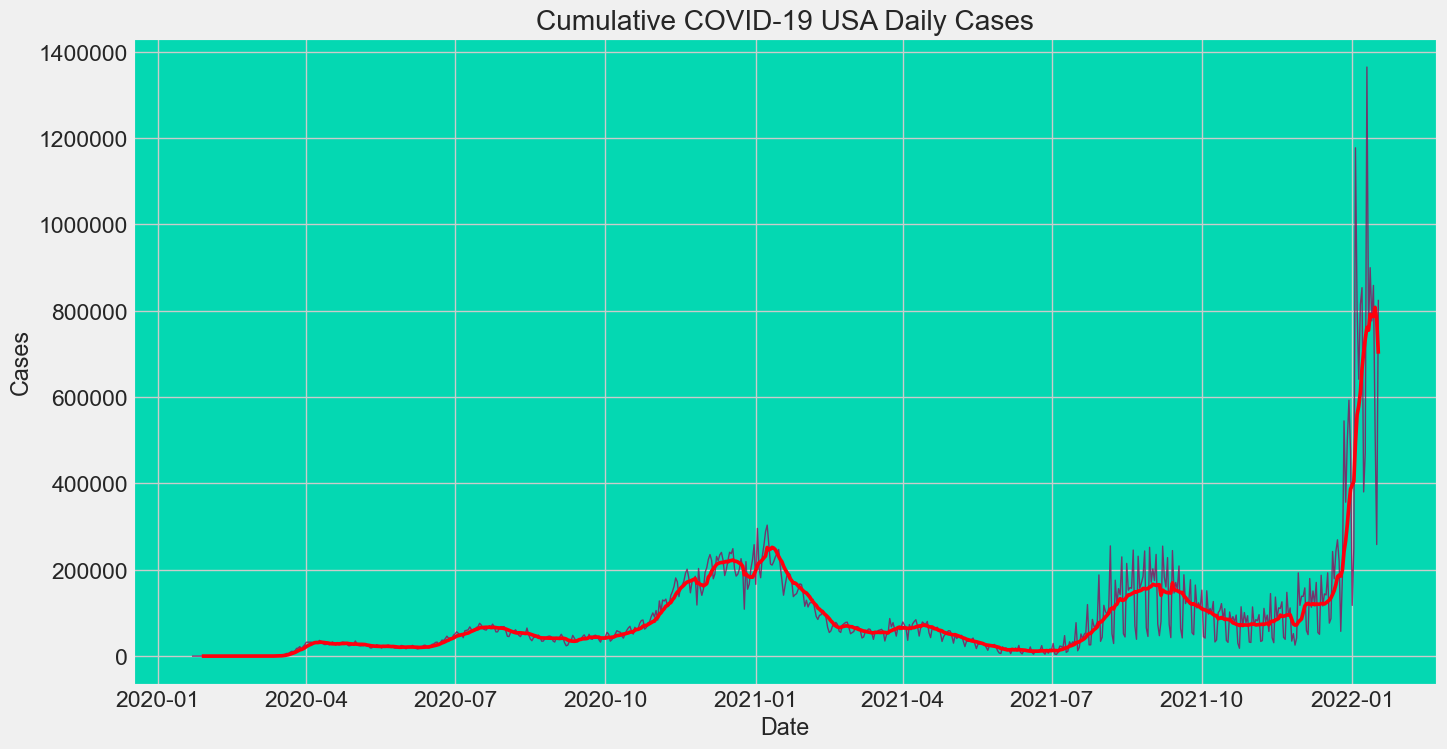

In [62]:
fig = plt.figure(figsize=(15,8),dpi=100)
x1=usa['total_cases'].diff(1).fillna(0)
ax=sns.lineplot(data=x1,x=x1.index,y=x1,color='#960056',lw=1,alpha=0.75)
ax=sns.lineplot(data=usa_rolling7, x=usa_rolling7.index,y=usa_rolling7,color='#ff000d',lw=2.65)
plt.ticklabel_format(style='plain', axis='y')

ax.set_title('Cumulative COVID-19 USA Daily Cases')
ax.set_facecolor('xkcd:aquamarine')
ax.set_ylabel("Cases")
ax.set_xlabel("Date")
# fig.savefig(f'{today}_USA_covid_Daily_Cases_All.png',dpi=165, bbox_inches='tight')

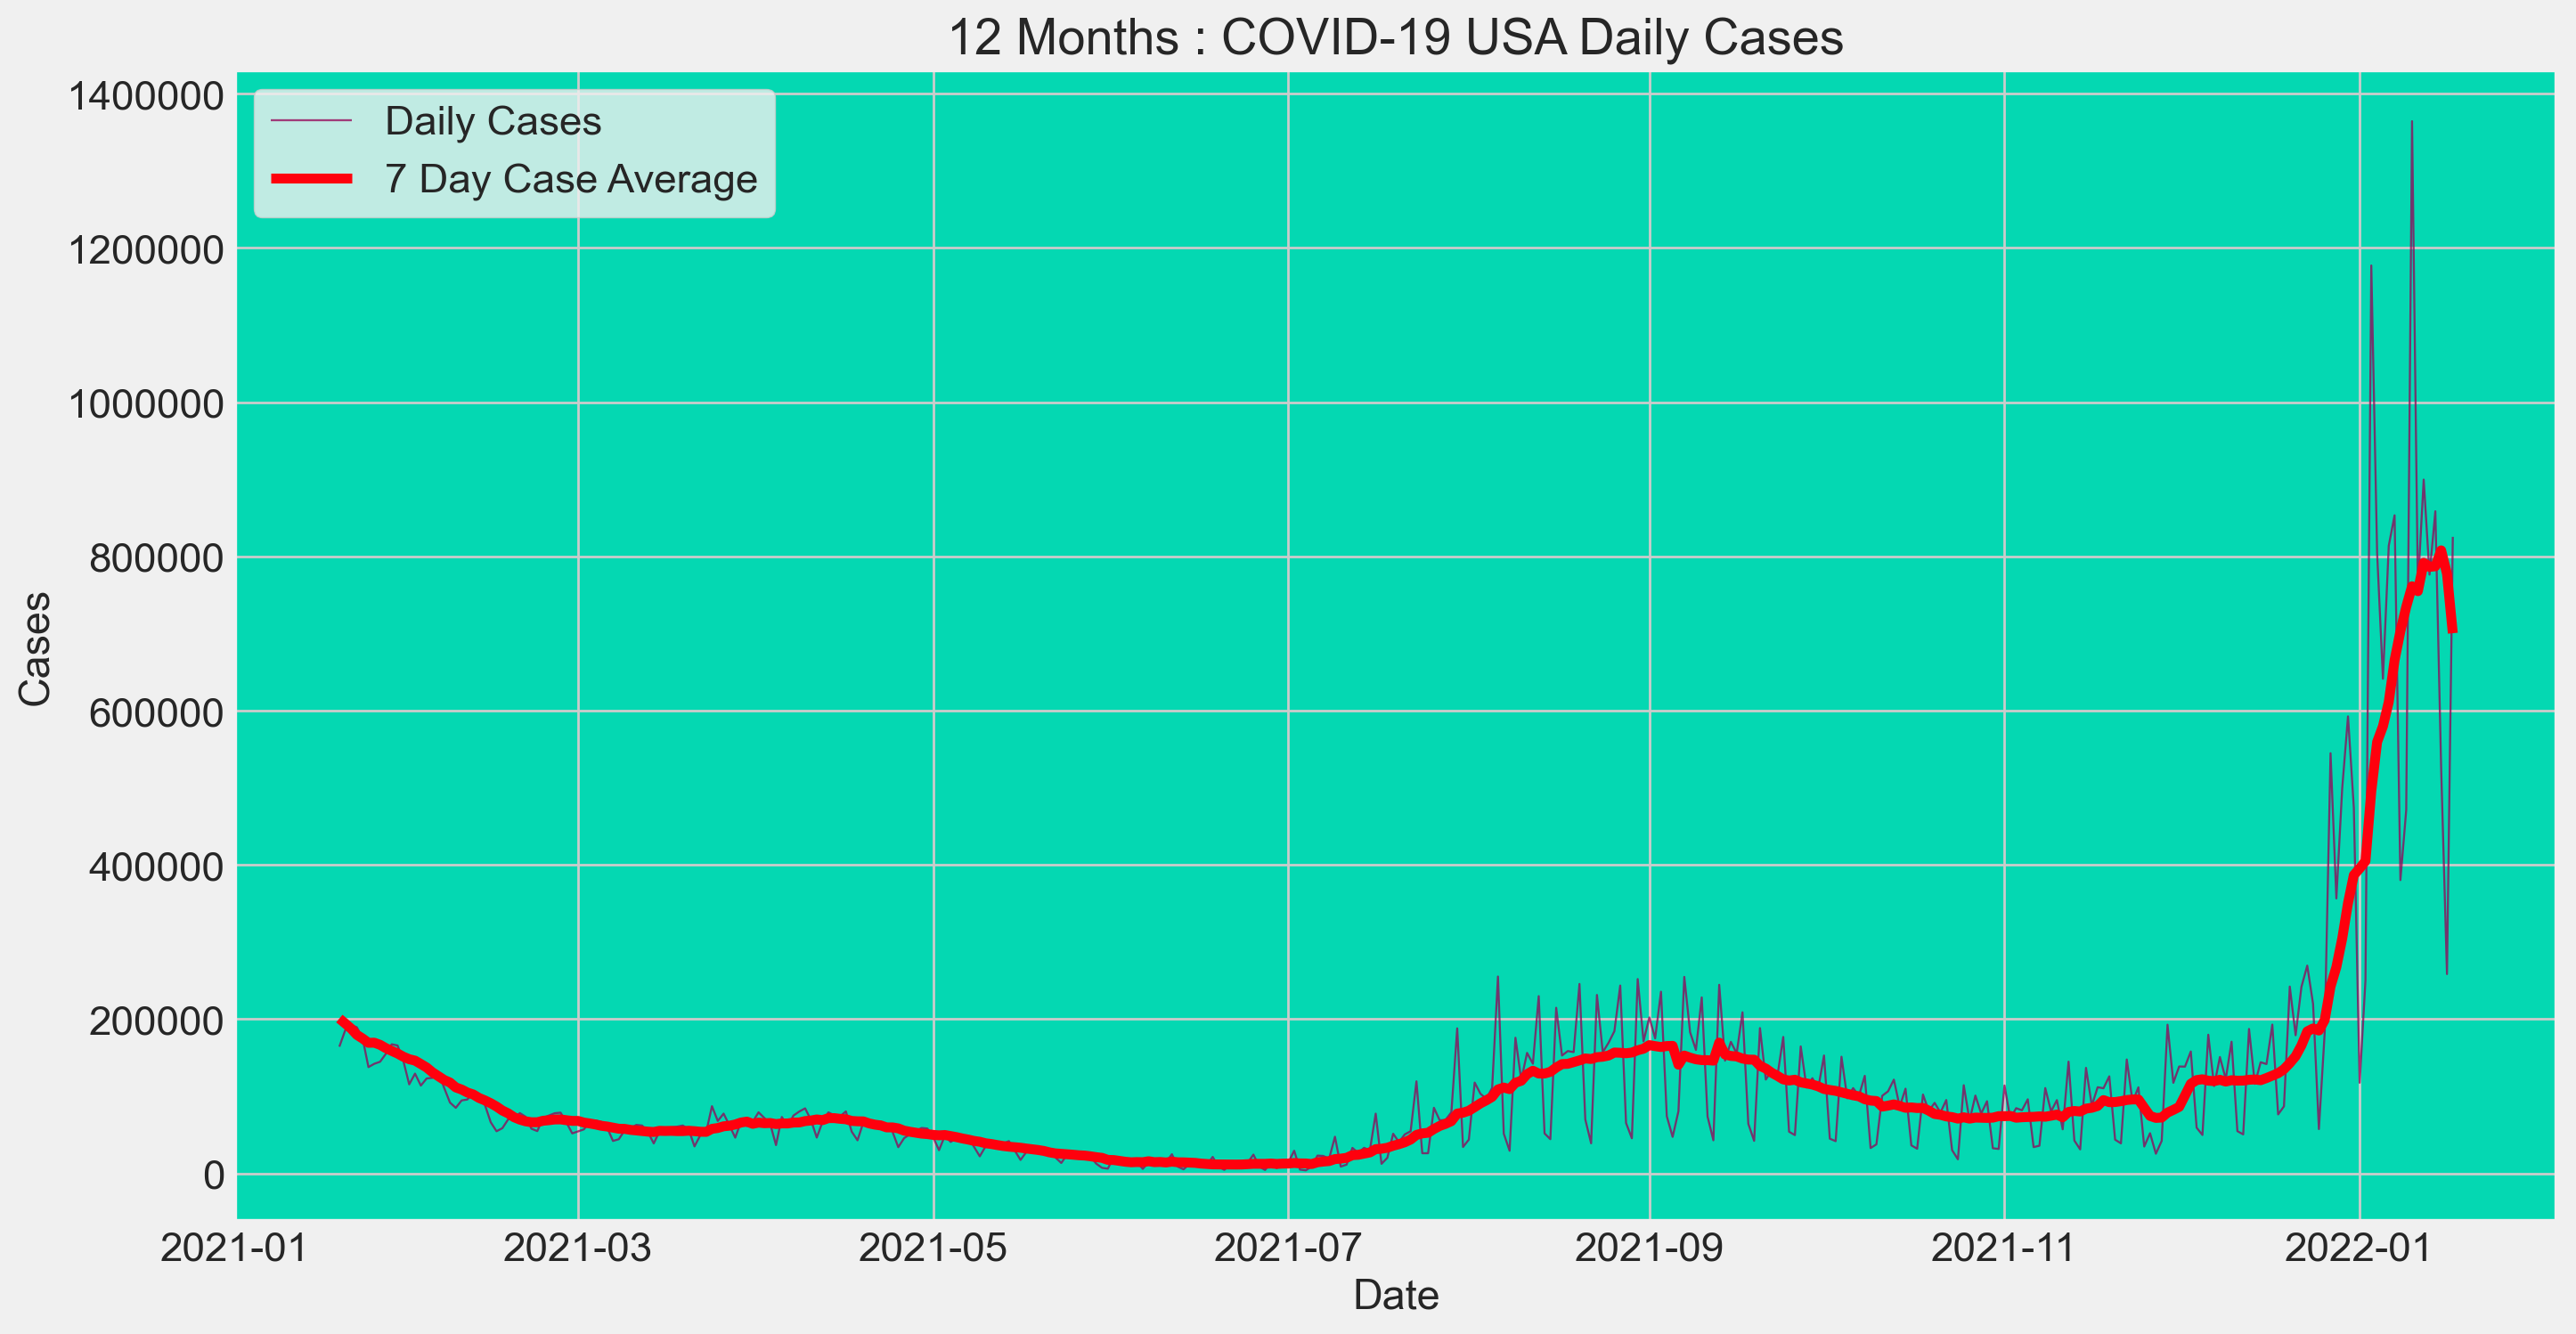

In [63]:
start=today-datetime.timedelta(weeks=52)
end=today
MA7=usa_rolling7.loc[start:]
fig = plt.figure(figsize=(15,8),dpi=200)
x1=usa_daily.loc[start:]
ax=sns.lineplot(data=x1,x=x1.index,y=x1,color='#960056',label='Daily Cases',lw=0.83,alpha=0.75)
ax=sns.lineplot(data=MA7, x=MA7.index,y=MA7,color='#ff000d',label='7 Day Case Average')
ax.set_title('12 Months : COVID-19 USA Daily Cases')
ax.set_facecolor('xkcd:aquamarine')
ax.set_ylabel("Cases")
ax.set_xlabel("Date")
plt.ticklabel_format(style='plain', axis='y')

# ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

# plt.xticks(rotation=270)
# fig.savefig(f'{today}_USA_covid_Daily_Cases.png',dpi=300, bbox_inches='tight')

Text(0.5, 0, 'Date')

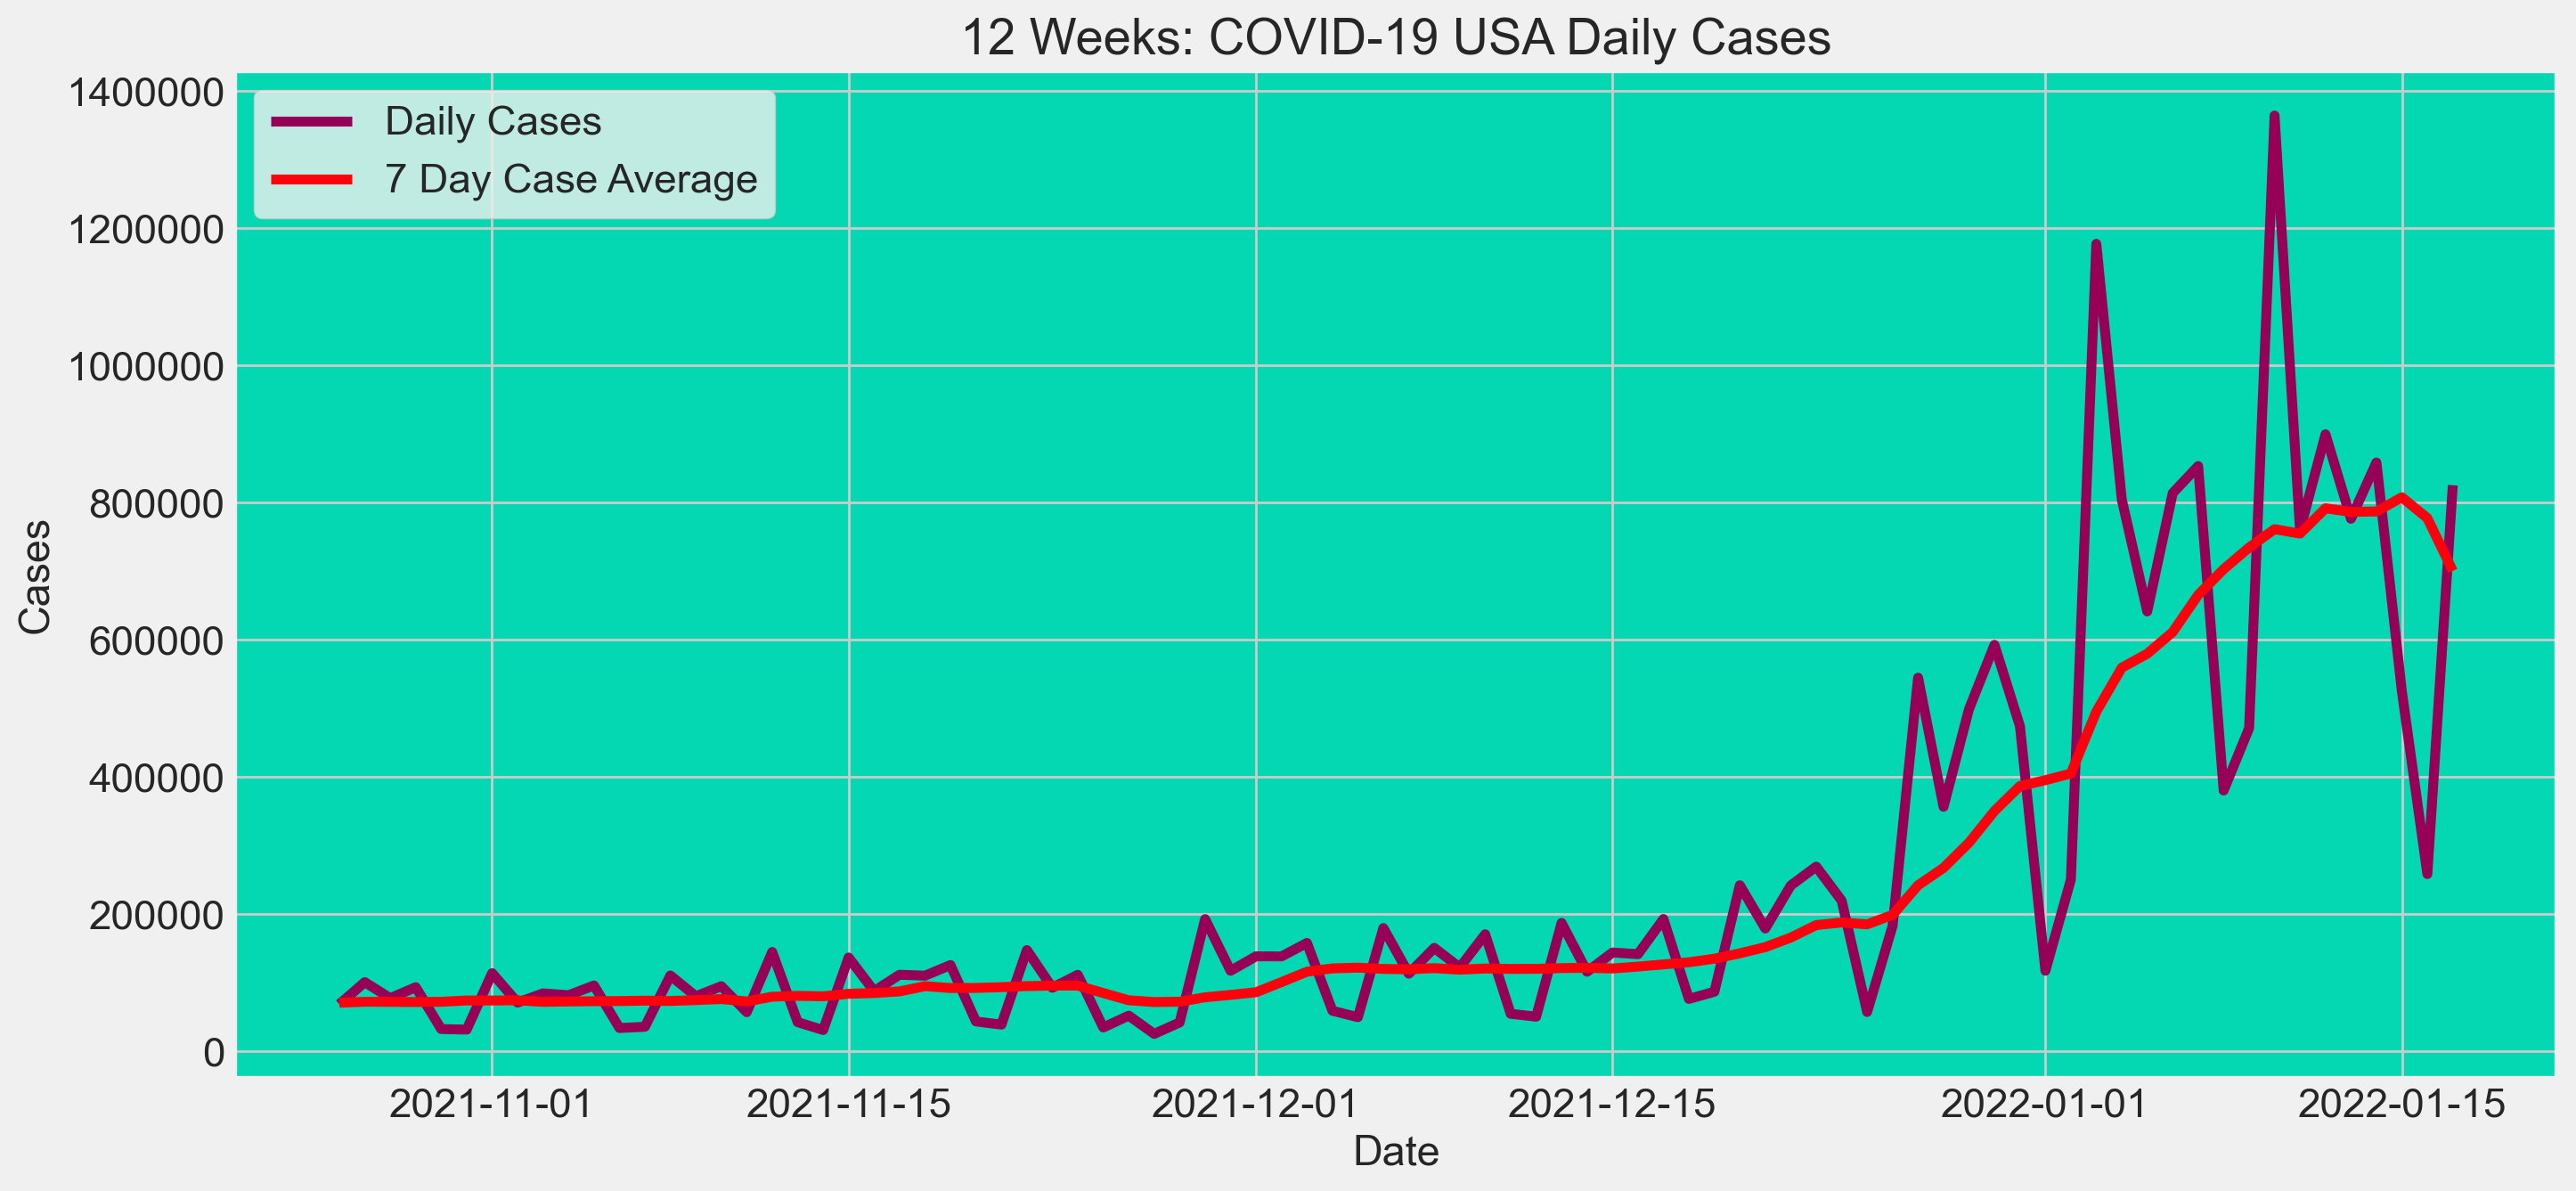

In [64]:
start=today-datetime.timedelta(weeks=12)
end=today
MA7=usa_rolling7.loc[start:]
fig = plt.figure(figsize=(15,7),dpi=200)
plt.ticklabel_format(style='plain', axis='y')

x1=usa_daily.loc[start:]
ax=sns.lineplot(data=x1,x=x1.index,y=x1,color='#960056',label='Daily Cases')
ax=sns.lineplot(data=MA7, x=MA7.index,y=MA7,color='#ff000d',label='7 Day Case Average')
ax.set_title('12 Weeks: COVID-19 USA Daily Cases')
ax.set_facecolor('xkcd:aquamarine')
ax.set_ylabel("Cases")
ax.set_xlabel("Date")

Text(0.5, 0, 'Date')

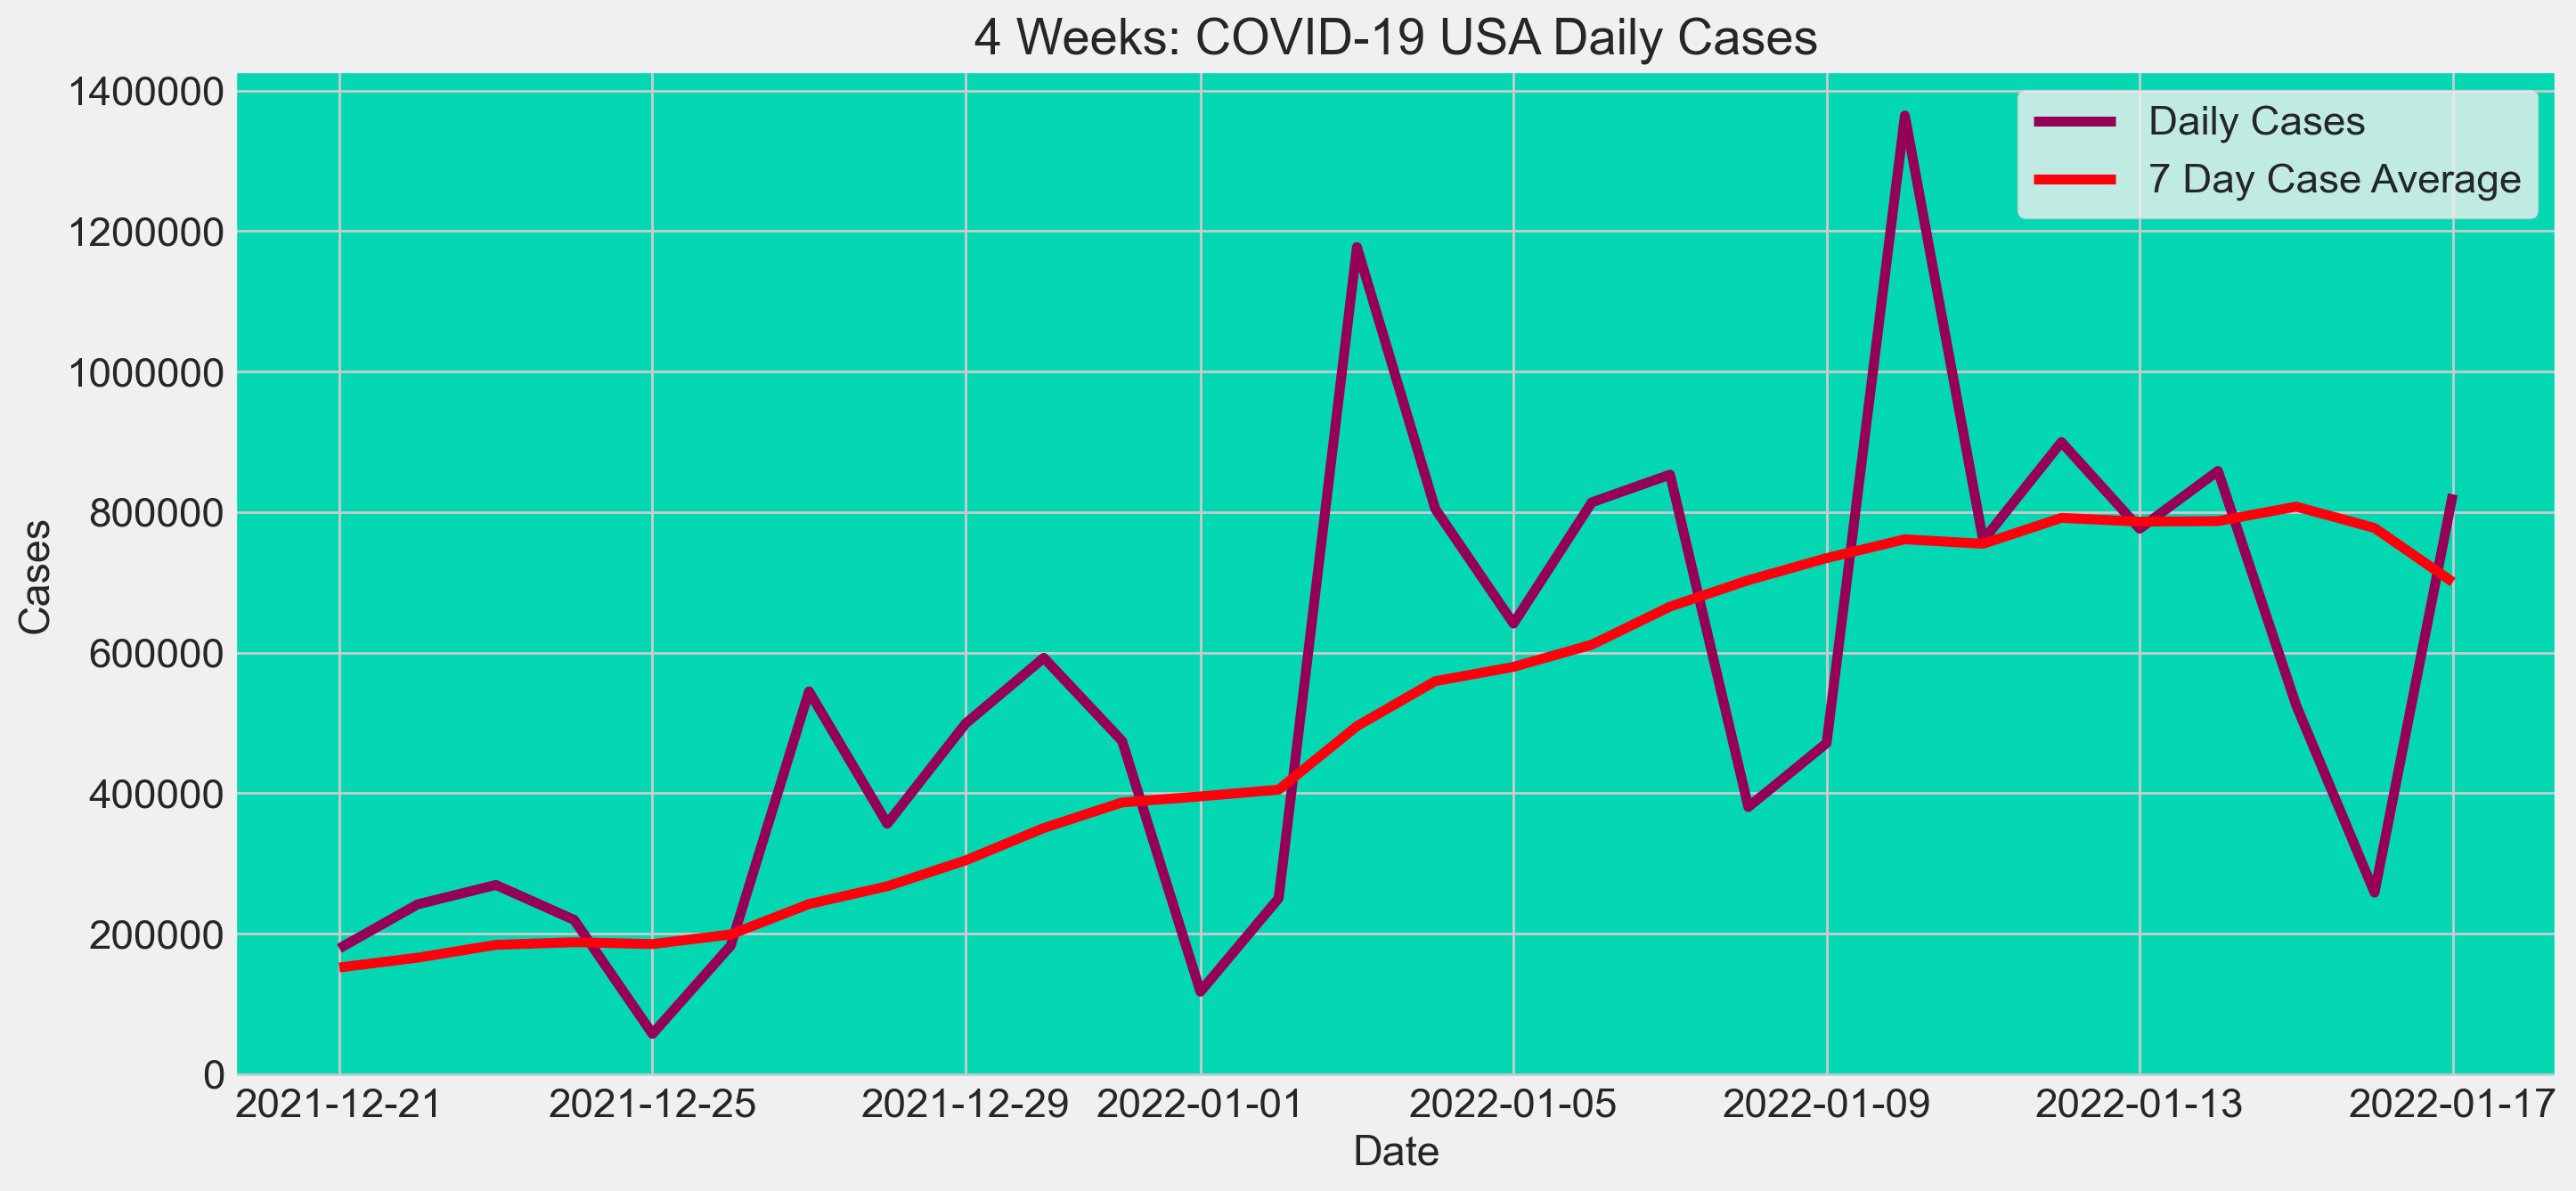

In [65]:
start=today-datetime.timedelta(weeks=4)
end=today
MA7=usa_rolling7.loc[start:]
fig = plt.figure(figsize=(15,7),dpi=200)
plt.ticklabel_format(style='plain', axis='y')

x1=usa_daily.loc[start:]
ax=sns.lineplot(data=x1,x=x1.index,y=x1,color='#960056',label='Daily Cases')
ax=sns.lineplot(data=MA7, x=MA7.index,y=MA7,color='#ff000d',label='7 Day Case Average')
ax.set_title('4 Weeks: COVID-19 USA Daily Cases')
ax.set_facecolor('xkcd:aquamarine')
ax.set_ylabel("Cases")
ax.set_xlabel("Date")
# fig.savefig(f'{today}_USA_covid_Daily_Cases.png',dpi=300, bbox_inches='tight')

# <font color='slateblue'> Most infectious day in USA

In [66]:
print(f"{usa_daily.max():,.0f}"," confirmed infections occurred on ",usa_daily.idxmax().strftime("%B, %d, %Y") )

1,364,418  confirmed infections occurred on  January, 10, 2022
